<a href="https://colab.research.google.com/github/AsRumi/PyTorch/blob/main/PyTorch_Exercises_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.3
bias = 0.9
X = torch.arange(1, 10, 0.1).unsqueeze(dim = 1)
Y = weight * X + bias

train_length = int((0.8*len(X)))
X_train = X[: train_length]
X_test = X[train_length: ]
Y_train = Y[: train_length]
Y_test = Y[train_length: ]

In [ ]:
print(X_train.dtype)

torch.float32


In [ ]:
def plot_data(X_train = X_train, X_test = X_test, Y_train = Y_train, Y_test = Y_test, Y_pred = None):
    plt.plot(X_train, Y_train, c = 'b', ls = ":", label = "Training points")
    plt.plot(X_test, Y_test, c = 'g', ls = ":", label = "Testing points")
    if Y_pred is not None:
        plt.plot(X_test, Y_pred, c = 'r', ls = ":", label = "Predicted Points")
    plt.legend()
    return

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(in_features = 1,
                               out_features = 1)

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.layer(x)

In [ ]:
torch.manual_seed(42)
model = LinearRegression()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
torch.manual_seed(50)
epochs = 300
train_loss_values = []
test_loss_values = []
epochs_list = []

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    train_loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        y_pred = model(X_test)
        test_loss = loss_fn(y_pred, Y_test.type(torch.float))
        if epoch % 30 == 0:
            epochs_list.append(epoch)
            train_loss = train_loss.to("cpu")
            test_loss = test_loss.to("cpu")
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.02770880050957203 | MAE Test Loss: 0.4287421703338623 
Epoch: 30 | MAE Train Loss: 0.02770880050957203 | MAE Test Loss: 0.4287421703338623 
Epoch: 60 | MAE Train Loss: 0.02770880050957203 | MAE Test Loss: 0.4287421703338623 
Epoch: 90 | MAE Train Loss: 0.02770880050957203 | MAE Test Loss: 0.4287421703338623 
Epoch: 120 | MAE Train Loss: 0.02770880050957203 | MAE Test Loss: 0.4287421703338623 
Epoch: 150 | MAE Train Loss: 0.02770880050957203 | MAE Test Loss: 0.4287421703338623 
Epoch: 180 | MAE Train Loss: 0.02770880050957203 | MAE Test Loss: 0.4287421703338623 
Epoch: 210 | MAE Train Loss: 0.02770880050957203 | MAE Test Loss: 0.4287421703338623 
Epoch: 240 | MAE Train Loss: 0.02770880050957203 | MAE Test Loss: 0.4287421703338623 
Epoch: 270 | MAE Train Loss: 0.02770880050957203 | MAE Test Loss: 0.4287421703338623 


In [ ]:
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('layer.weight', tensor([[0.3077]], device='cuda:0')), ('layer.bias', tensor([0.8372], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [ ]:
model.eval()
y_pred = None
with torch.inference_mode():
    model.to("cpu")
    X_test = X_test.to("cpu")
    y_pred = model(X_test)

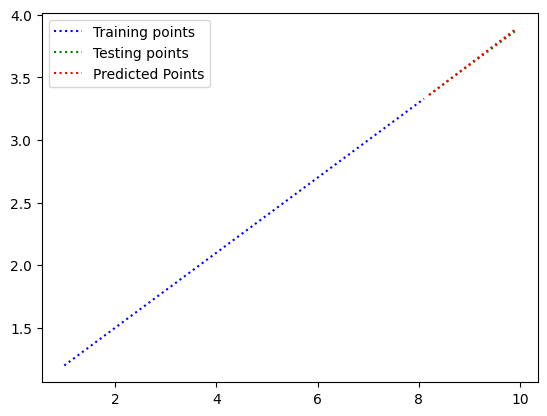

In [ ]:
plot_data(Y_pred = y_pred)

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_exercise.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_exercise.pth
